<a href="https://colab.research.google.com/github/nicoacebal/Entrega1-Acebal/blob/main/Base_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Github

/content/drive/MyDrive/Github


# Introducción

El prominente mercado de las criptomonedas, caracterizado por un alto nivel especulativo
y de gran volatilidad, plantea un novedoso y desafiante escenario para la aplicación de
métodos de pronósticos sobre series temporales. En este contexto, Bitcoin se destaca por
abarcar la mayor parte de la capitalización total del mercado, así como del volumen total
de transacciones diarias. El presente proyecto plantea realizar un análisis de la efectividad
de la aplicación de algoritmos de aprendizaje automático al problema de generar predicciones sobre el precio de Bitcoin.

# 0. Sistema Precio-Volumen
Esta teoría dice que cuando una acción (o el índice del mercado) sube y el volumen de contratación es alto, existe un exceso de interés por comprar, por lo que el precio de la acción en cuestión seguirá subiendo.

Cuando el precio desciende y el volumen de contratación es alto, existe un exceso de interés por vender, y el precio seguirá descendiendo. El mercado es fuerte en el primer caso y débil en el segundo. Sin embargo, cuando el precio baja y el volumen de contratación es reducido, el mercado es técnicamente fuerte, ya que el publico espera a que el precio vuelva a subir para vender sus acciones. Por el contrario, cuando el precio sube y el volumen de negociación es muy bajo, el mercado es técnicamente débil, ya que el publico no confía en el alza y no se decide a comprar.

Según esta teoría se debe comprar cuando el precio sube y el volumen de contratación es alto, y se debe vender cuando el precio desciende y el volumen de contratación sigue siendo elevado. También se debe de comprar cuando el precio baja y el volumen es reducido, y vender con precios al alza, pero con volumen reducido.


**ANALISIS ON CHAIN**
---
Consiste en examinar los fundamentos, la utilidad, y las transacciones de una criptomoneda y sus datos en blockchain (que funciona como un libro contable  abierto, y permite a un observador analizar cada transacción realizada y estimar la cantidad de monedas que están almacenadas o que han sido movidas por cualquier dirección en la red para analizar la situación macroeconómica del mercado.


Una correcta lectura nos puede ayudar mucho a saber cuando salir o entrar en un proyecto o como manejar nuestro portafolio.


# ¿Qué son los datos On-Chain?

Son transacciones realizadas en una blockchain pública y descentralizada. Esto incluye la autenticación y validación de transacciones por parte de mineros de criptomonedas.

Los diferentes detalles de una transacción se registran en el bloque y se distribuyen a toda la blockchain, haciendo que la transacción sea irreversible, ya que no se puede modificar. Las carteras revelan las posiciones y las bases de costos de cada holder en cualquier momento del día.

A largo plazo, el precio del bitcoin puede reaccionar más a los datos brutos que muestran la salud de la red, pero a corto y medio plazo el comportamiento de los compradores y vendedores puede ayudar a los inversores a superar el ruido en el precio y evaluar si un determinado activo es productivo o no.

# Algunas de las métricas
A continuación, ejemplificaremos las principales métricas utilizadas para comprender el mercado de activos digitales a través de herramientas. Estas se encontrarán ordenadas de acuerdo a las solicitudes de las API

# 1. RHOLD RATIO

EL Rhold ratio es una métrica que compara la cantidad de BTC que se ha retenido en una semana con respecto a lo que se ha retenido en 1-2 años.
Si sube el ratio significa que hay más tenedores de BTC a corto y que el mercado puede estar sobrecomprado (sube demanda, sube precio); si cae, lo contrario

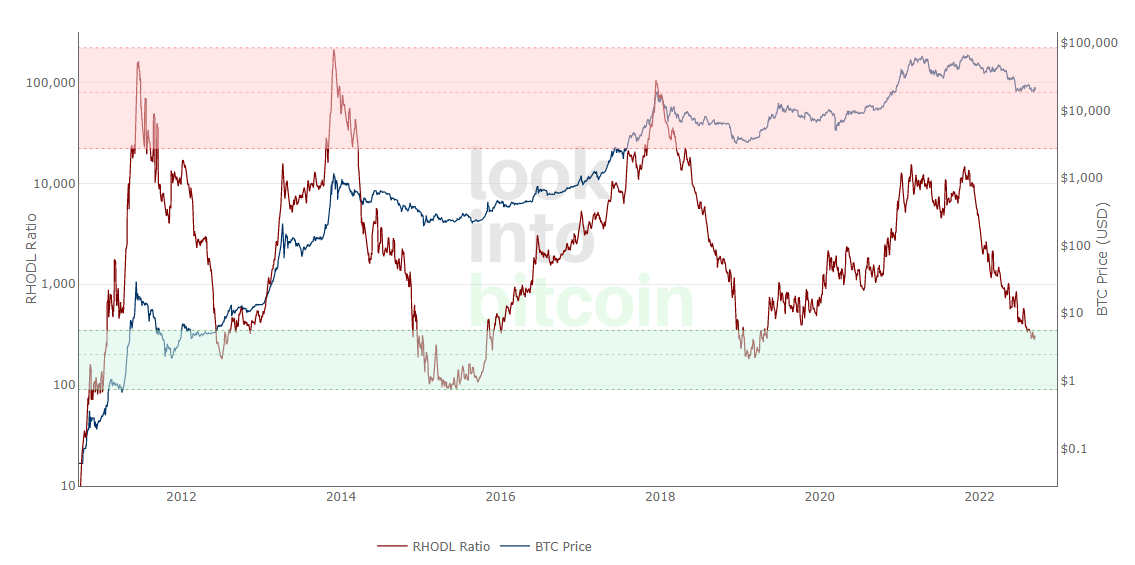


En este caso, vemos como en la actualidad nos puede indicar una posible compra, ya que el mercado se encuentra sobrevendido.





# 2. MVRV Z-SCORE

Compara la capitalización del mercado actual de BTC (Cantidad de tokens x Precio actual) respecto a su valor realizado

El valor realizado es : La ultima vez que se movió c/ $BTC, toma el precio del día, lo suma y saca un promedio.

En lugar de la capitalización de mercado común, utiliza el precio en el momento en que se tradearon por última vez. Como resultado de esta modificación, puede verse como una representación más precisa del valor actual de BTC. Una de las principales características del valor realizado es la devaluación de las monedas que no se han movido durante mucho tiempo o las que se pierden.




Y el Z-Score es

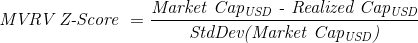

Es decir, el número de desviaciones estándar de la media de un punto de información.


Si el valor del mercado es > al valor realizado, esta sobrecomprado.
Caso contrario, está sobrevendido (indicador de posible compra).

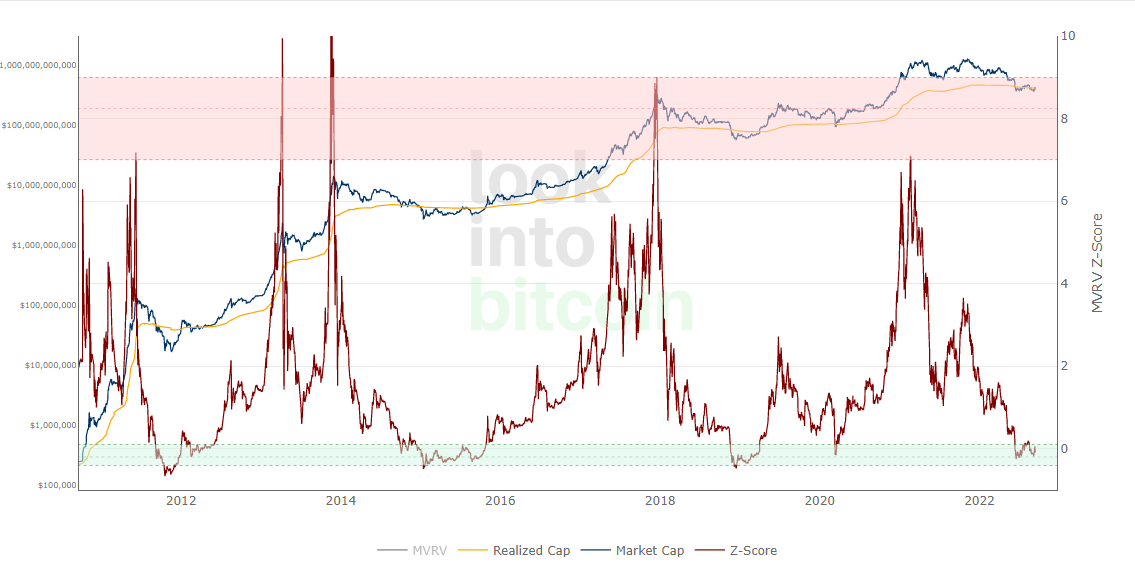


# 3. Pi Cycle TOP

Pi Cycle Top es un indicador de análisis técnico muy simple, pero efectivo, y radica en el hecho de que a pesar de su simplicidad, ha predicho 4 picos históricos en el precio de Bitcoin seguidos de al menos una corrección del 55%.

Consta de dos medias móviles (DMA), una de  111 días, y el otro de 350 x 2.

En estadística, una media móvil es un cálculo utilizado para analizar un conjunto de datos en modo de puntos para crear series de promedios. Así las medias móviles son una lista de números en la cual cada uno es el promedio de un subconjunto de los datos originales.

Obtenemos la señal máxima del indicador Pi Cycle Top cuando el DMA de 111 días cruza el DMA de 350 días x 2 desde abajo. Desde la fecha de esta señal, Bitcoin siempre ha alcanzado su punto máximo con un umbral de tolerancia máximo de 5 días antes o después.

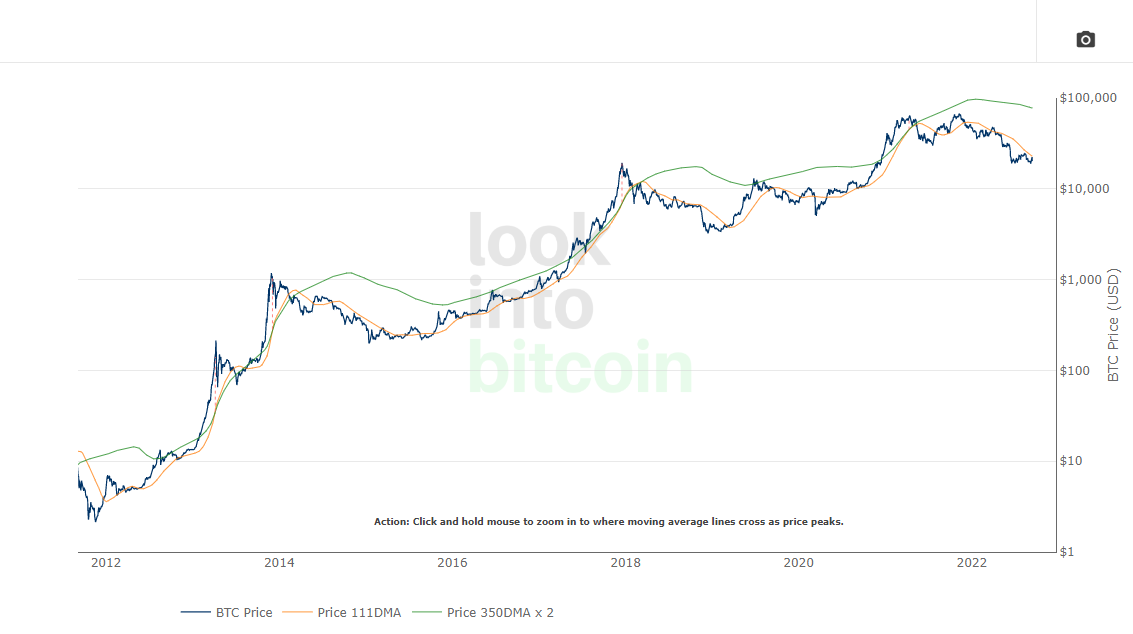

Fijarse que cada vez que la línea amarilla cruza a la verde desde abajo, se alcanza un nuevo máximo, y luego comienza la corrección a la baja. En este caso, nos indicaría una señal de venta.

# 4. Balance Exchanges

Con esta métrica podemos ver el nivel de BTC que hay saliendo o entrando a los exchanges y por tanto, entrando o saliendo a las cold Wallet (Estas se utilizan para atesorar, lo que reducen la oferta y hacen aumentar el precio). La lectura que se puede hacer es que si los $BTC están saliendo de los exchanges, es porque se está acumulando y acumulando, provocando un incremento en el precio, ergo, señal de compra.

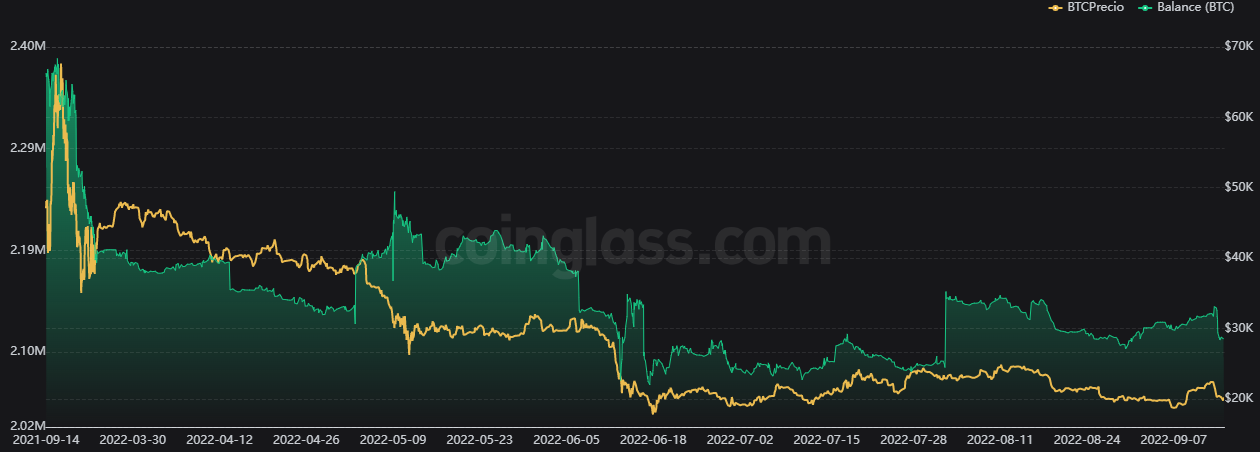

# 5. USD PRICE CLOSE

Es el precio del BTC al que cierra en el día

# 6. SOPR

El SOPR es un indicador muy simple. Se calcula a partir de los «spent outputs» (salidas gastadas). Es el valor realizado (USD) dividido por el valor en la creación (USD) de la salida. 

En resumidas cuentas, mide la variación entre el precio de compra y venta de Bitcoin, es decir, es un indicador que mide las ganancias y pérdidas generales del mercado (precio vendido/precio pagado).

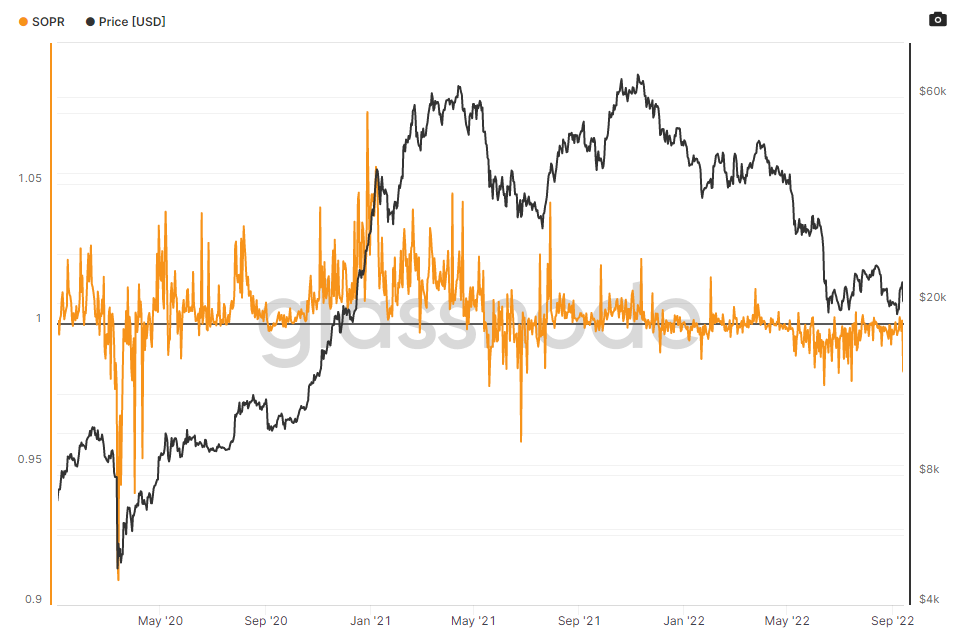

Con respecto a como interpretar el indicador:

Si el SOPR es mayor que 1, entonces nos dice que, en promedio, las personas están vendiendo con ganancias. Por otro lado, si el SOPR es menor que 1, entonces nos dice que la persona promedio está vendiendo Bitcoin con pérdidas.


La idea de compra sería cuando el SOPR es menor que 1, ya que nos indica que hay pánico en el mercado.

# 7. Realized Loss

Son las pérdidas o ganancias flotantes obtenidas antes de vender algún instrumento financiero. En el momento en que un inversor compra un instrumento financiero, habrá una pérdida o una ganancia debido a la fluctuación del precio. Las pérdidas o ganancias derivadas de esta fluctuación de precios son pérdidas o ganancias no realizadas hasta que se venda el instrumento financiero.

En este caso, las perdidas realizadas son las pérdidas cuando un inversor vende su BTC.

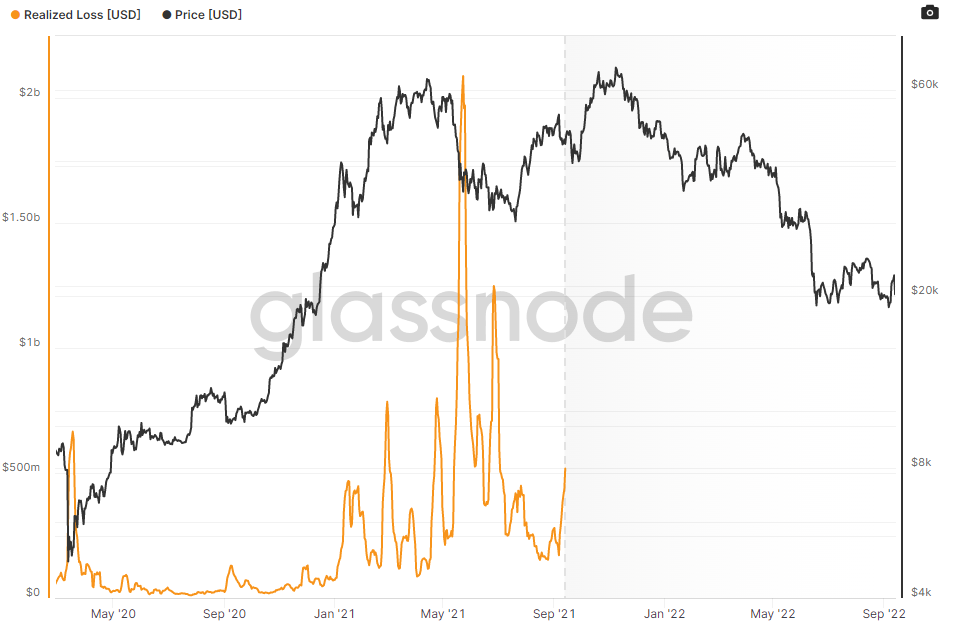


Si el valor es muy alto, significa que hay personas vendiendo con pérdidas, lo cual nos permite determinar que el precio ha bajado y es una buena señal de entrada.

# 8. Profit Relative

Una moneda está en ganancias si el precio actual es más alto que el precio en el momento en que se movió (compró) por última vez. Por el contrario, una moneda tiene pérdidas si el precio actual es más bajo que el precio en el momento en que se movió (compró) por última vez.

El porcentaje de suministro en beneficio (que es el profit relative) nos indica el porcentaje del suministro total que actualmente está en beneficio. Esta métrica representa un oscilador que nos permite comprender mejor el estado actual del mercado para una moneda dada.

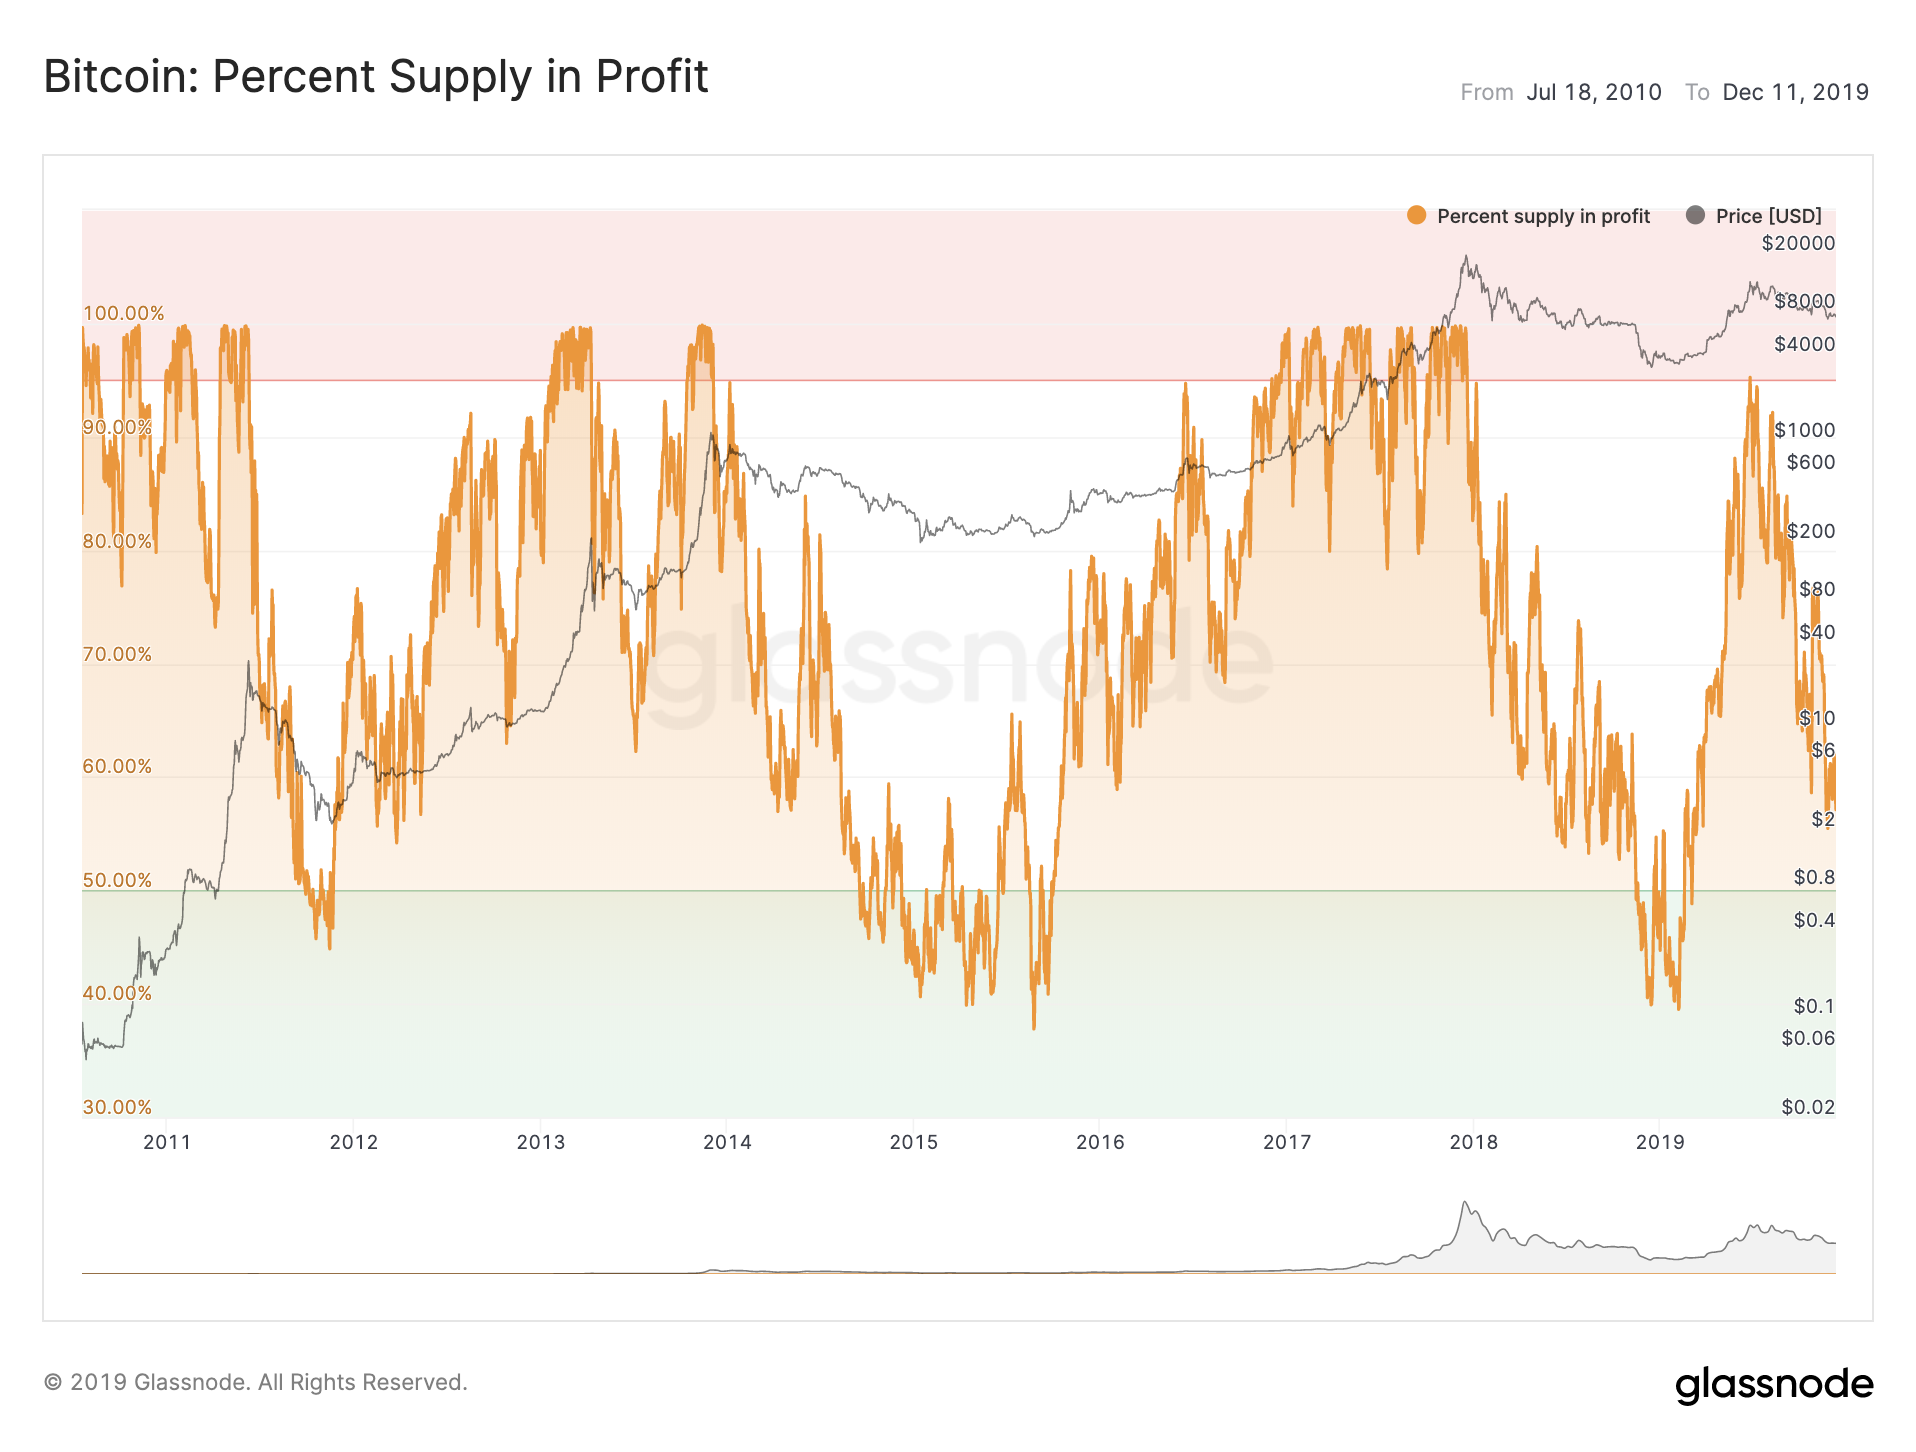

El cálculo del mismo es sencillo:


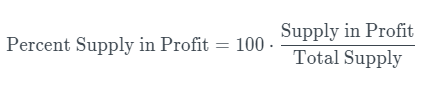

En general, los valores por encima del 95 % sugieren techos de mercado, mientras que los valores por debajo del 5 % señalan suelos.




# 9. Difficulty Latest

Aquí ya nos metemos en la sección de minado. El minado es el proceso por el cual consiste en validar y agrupar las transacciones, hechas por los usuarios dentro de la red determinada, en bloques que posteriormente serán unidos a la cadena de bloques conocida como Blockchain.

Pero, ¿Cómo se asigna a la persona que va a validar el bloque en la red?

Para minar un bloque el minero deberá de encontrarse el nonce (‘number that can be only used once’) que dentro de la operación de minado dé con un hash que cumpla con el patrón buscado.

Los mineros deben resolver un complejo algoritmo llamado hash (en particular para Bitcoin es de tipo SHA-256), que se encarga de transformar cualquier bloque arbitrario de datos en una nueva serie de caracteres con una longitud fija. Independientemente de la longitud de los datos de entrada, el valor hash de salida tendrá siempre la misma longitud.


Si bien el proceso de calcular hashes es muy rápido, Bitcoin tiene una complejidad / dificultad de minería dinámica. Esto lleva a los mineros a usar un alto poder de cómputo para resolver los acertijos Bitcoin. Al resolverlos, los mineros son recompensados con 12,5 BTC por bloque. Este incentivo económico es el que mantiene el funcionamiento y la seguridad de toda la red Bitcoin.

El término “dificultad” se emplea como una unidad de medida en el proceso de minería en criptomonedas, haciendo referencia a cuán difícil es encontrar el hash del bloque. Como cada bloque dentro de la red se genera a un ritmo determinado por el protocolo de la blockchain. Y este ritmo debe permanecer, en la medida de lo posible, de forma constante (cada 10 minutos de media).

Pero si un minero tiene un poder de cómputo demasiado alto o se encuentran muchos mineros trabajando en línea, esta media se perdería, ya que se minarían todos los Bitcoins mucho más rápido. Lo mismo pasa si los mineros se desconectan de la red: La emisión de bloques se haría más lenta y se emitirían menos bloques de lo estipulado.

Por lo que aquí es donde Bitcoin añadió uno de sus componentes más importantes: el reajuste de la dificultad de minería (o HASH RATE).

Sin este reajuste, ese minero minaría todos los bloques en poco tiempo, rompiendo la curva de emisión de bitcoin preestablecida en el modelo económico que subyace al protocolo de Bitcoin. Es decir, en poco tiempo todos los bitcoin estarían minados.

Para evitar esto el reajuste de minado entra en acción, y aumenta la complejidad del problema matemático buscado. De esta forma, se estabiliza de nuevo el tiempo de cada bloque a 10 minutos (de media). Este reajuste ocurre de forma automática cada 2.016 bloques (aproximadamente cada dos semanas).

Entendido un poco más el concepto, si bien esta métrica no será tan determinante ya que no tiene relación directa con el precio, nos puede dar un parámetro de cuanto interés hay por el Bitcoin ya que más gente intenta minarlos para obtener rédito de ello.

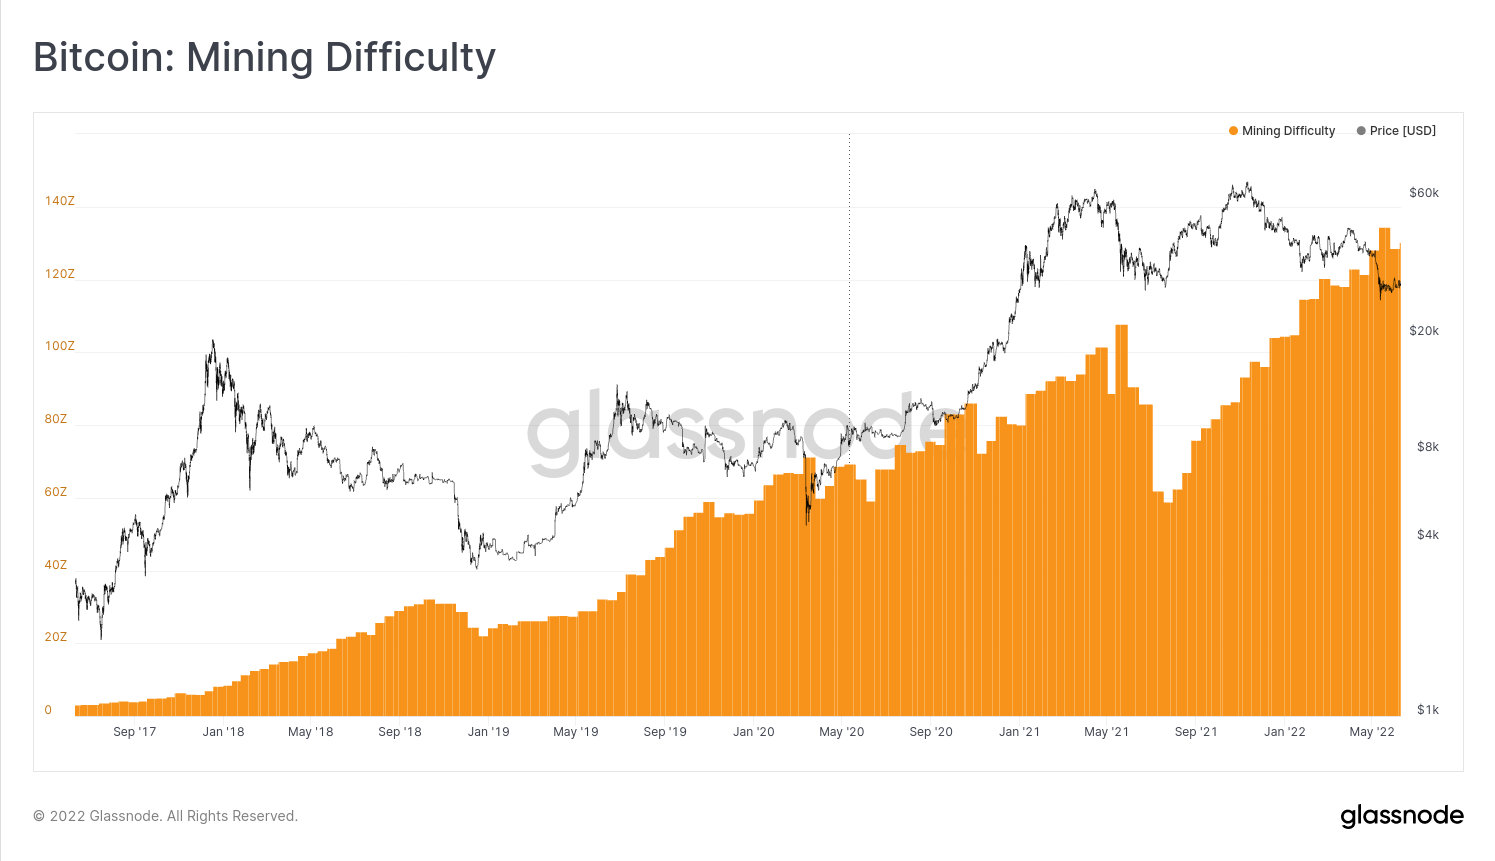


# 10. Difficulty Ribbon Compression


Difficulty ribbon (cinta de dificultad, en español) es un indicador on-chain que emplea promedios móviles (MA) de la dificultad de minería de Bitcoin. Después, difficulty ribbon compression (compresión de la cinta de dificultad, en español) agrega una desviación estándar además de esto para determinar mejor si el mercado está cerca de tocar fondo.

A lo largo de su historia, valores entre 0.01 y 0.02 se han asociado a fondos, lo que sugiere un buen momento para compra.


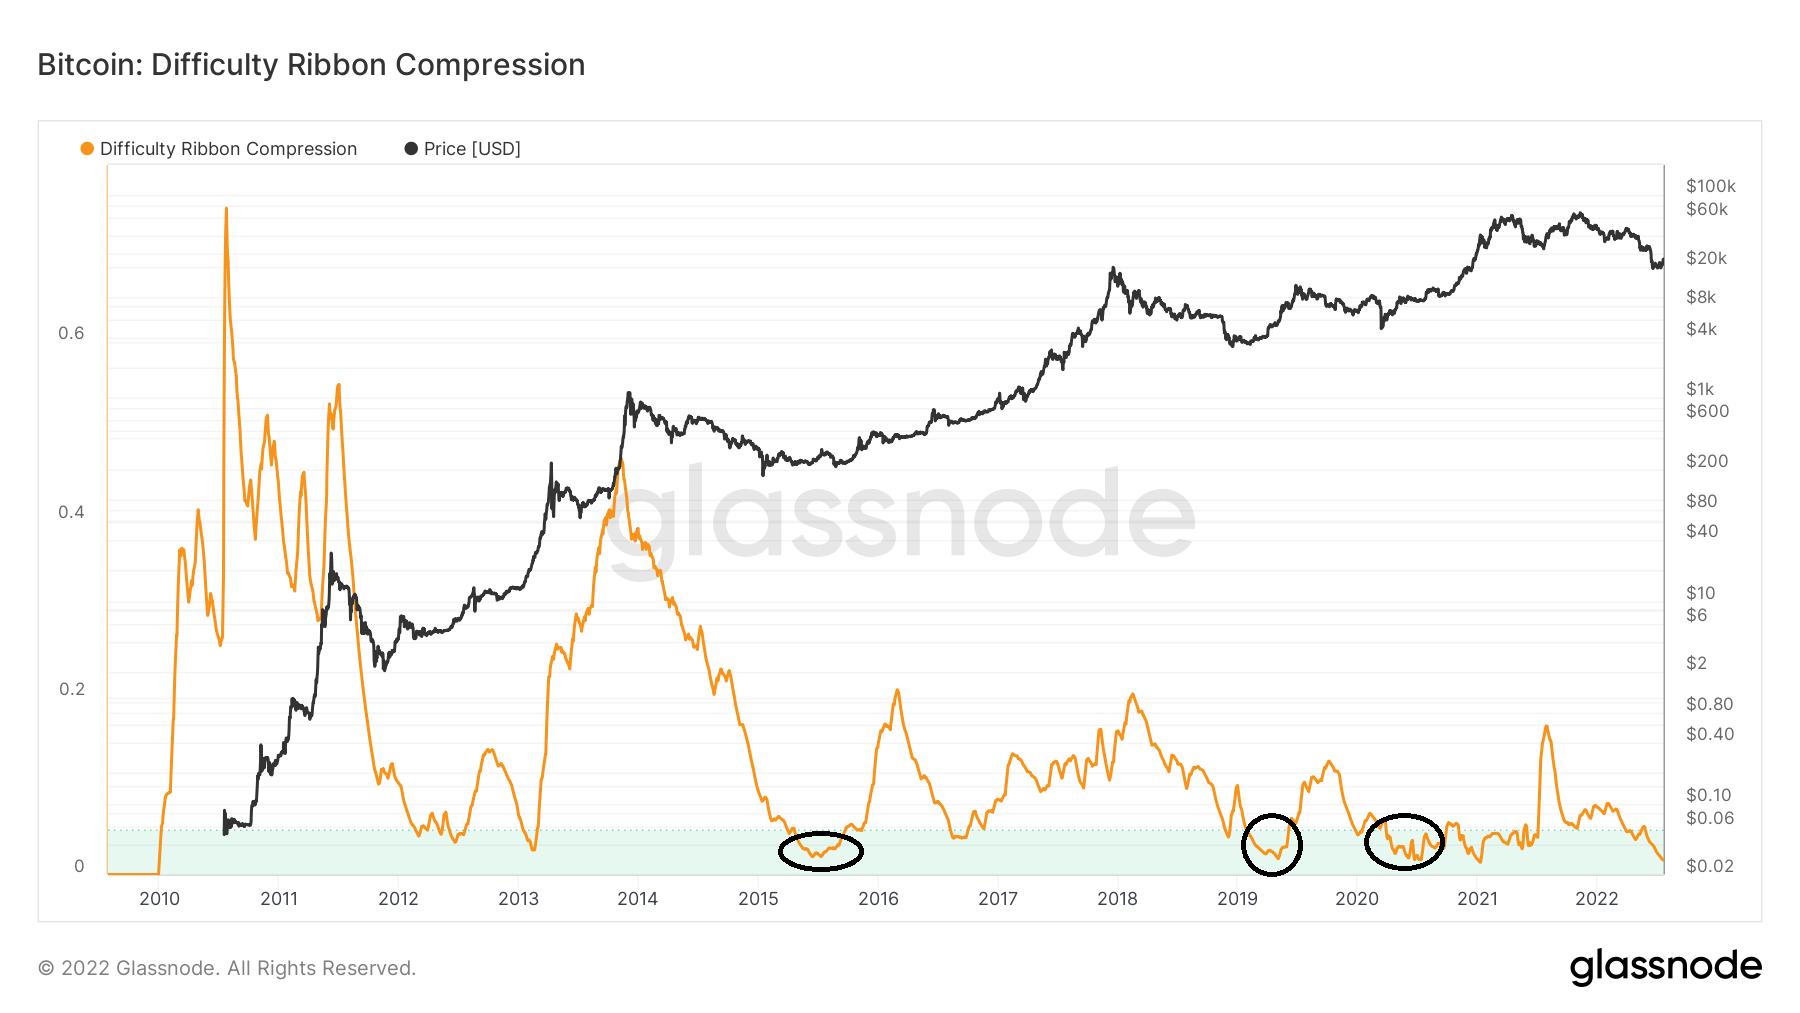




# 11. Hash Ribbon

El indicador hash ribbon utiliza el hashrate para determinar si los mineros han capitulado. La capitulación de los mineros ocurre cuando las recompensas mineras son más bajas que los costos.

Esto quiere decir, que si por bloque recibían 12.5 BTC como recompensa, con la recapitulación recibirán la mitad.

Esto se da porque así esta configurado en la whitelist de Bitcoin, ya que la emision tiene a bajar hasta que sea nula, una vez emitidos los 21 millones de BTC posibles.

Entonces, antes de la capitulación, los mineros venden sus BTC obtenidos para renovar hardware o simplemente tomar ganancias, una vez que la recompensa se setea, estos ya vuelven a la carga con equipos renovados, lo que nos indica un posible piso en el precio, ya que luego de esto, los mineros vuelven a acumular.


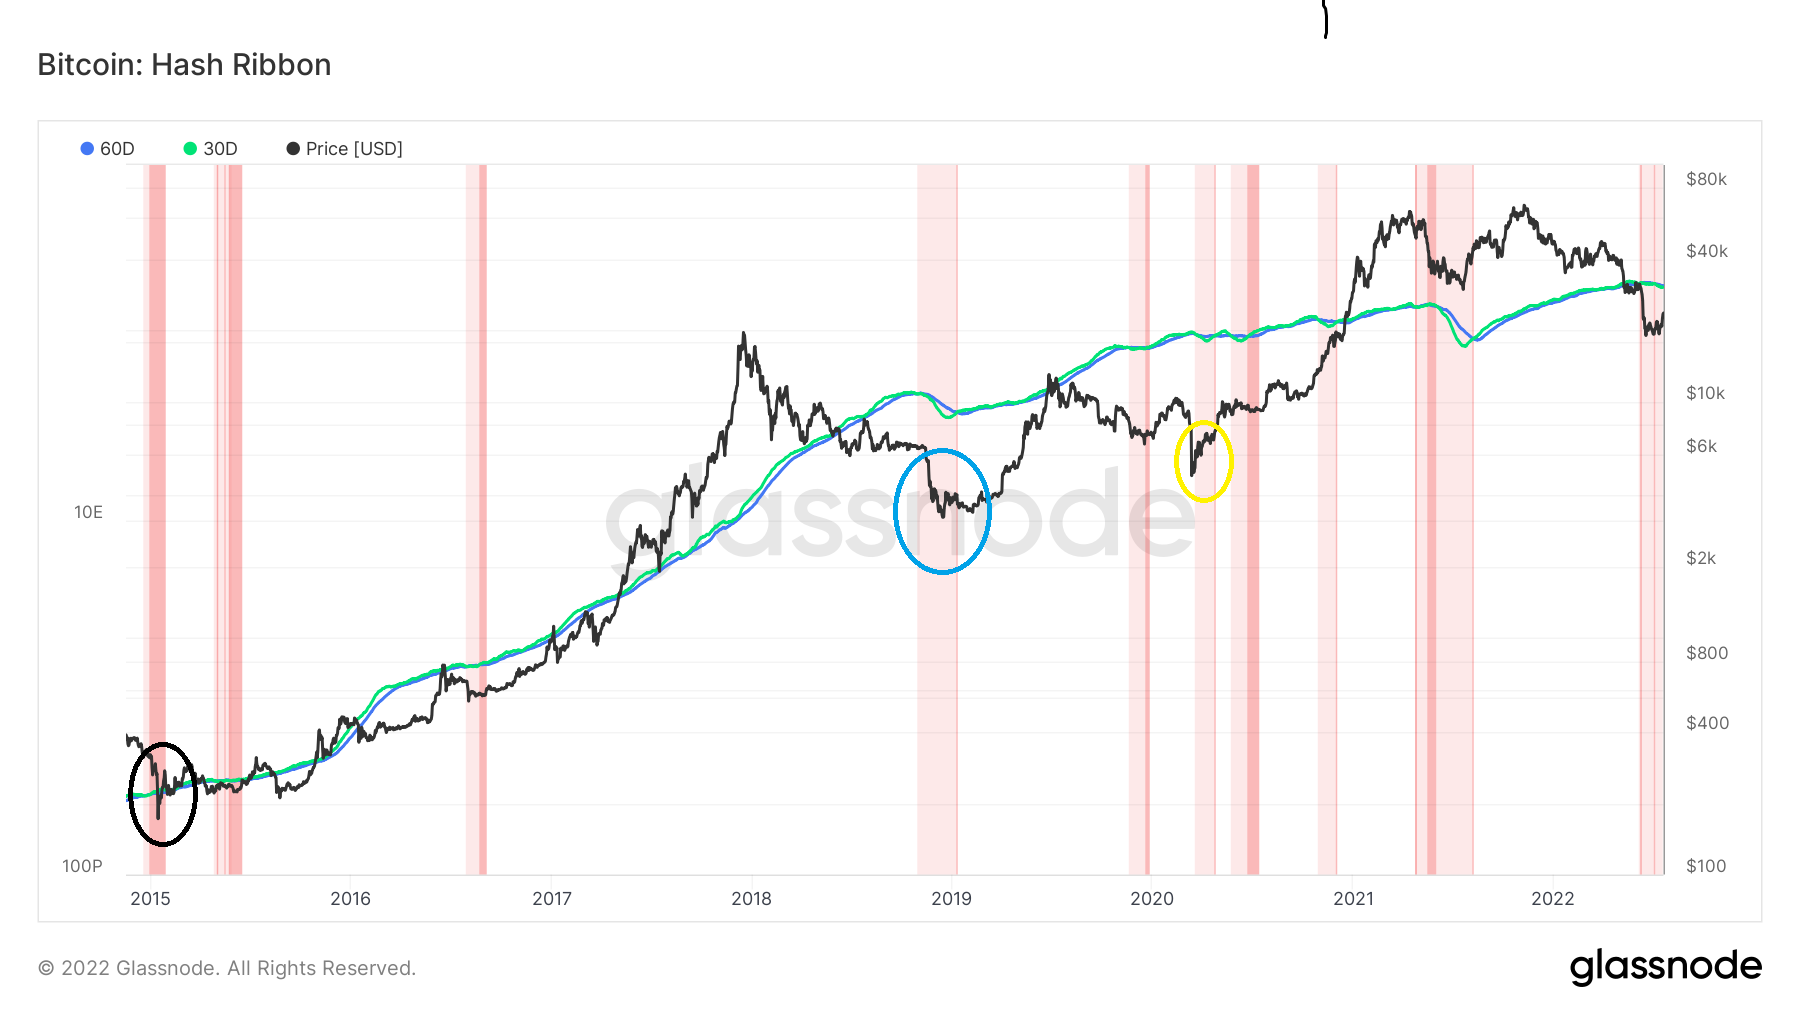

# 12. Balance Miners Change

Siguiendo con el comportamiento de mineros, se puede analizar, esta métrica lo que indica es el balance que tienen los mineros. Esto sirve para leer cuando se encuentran vendiendo (lo que indica una tendencia bajista) o acumulando (buen momento de compra).


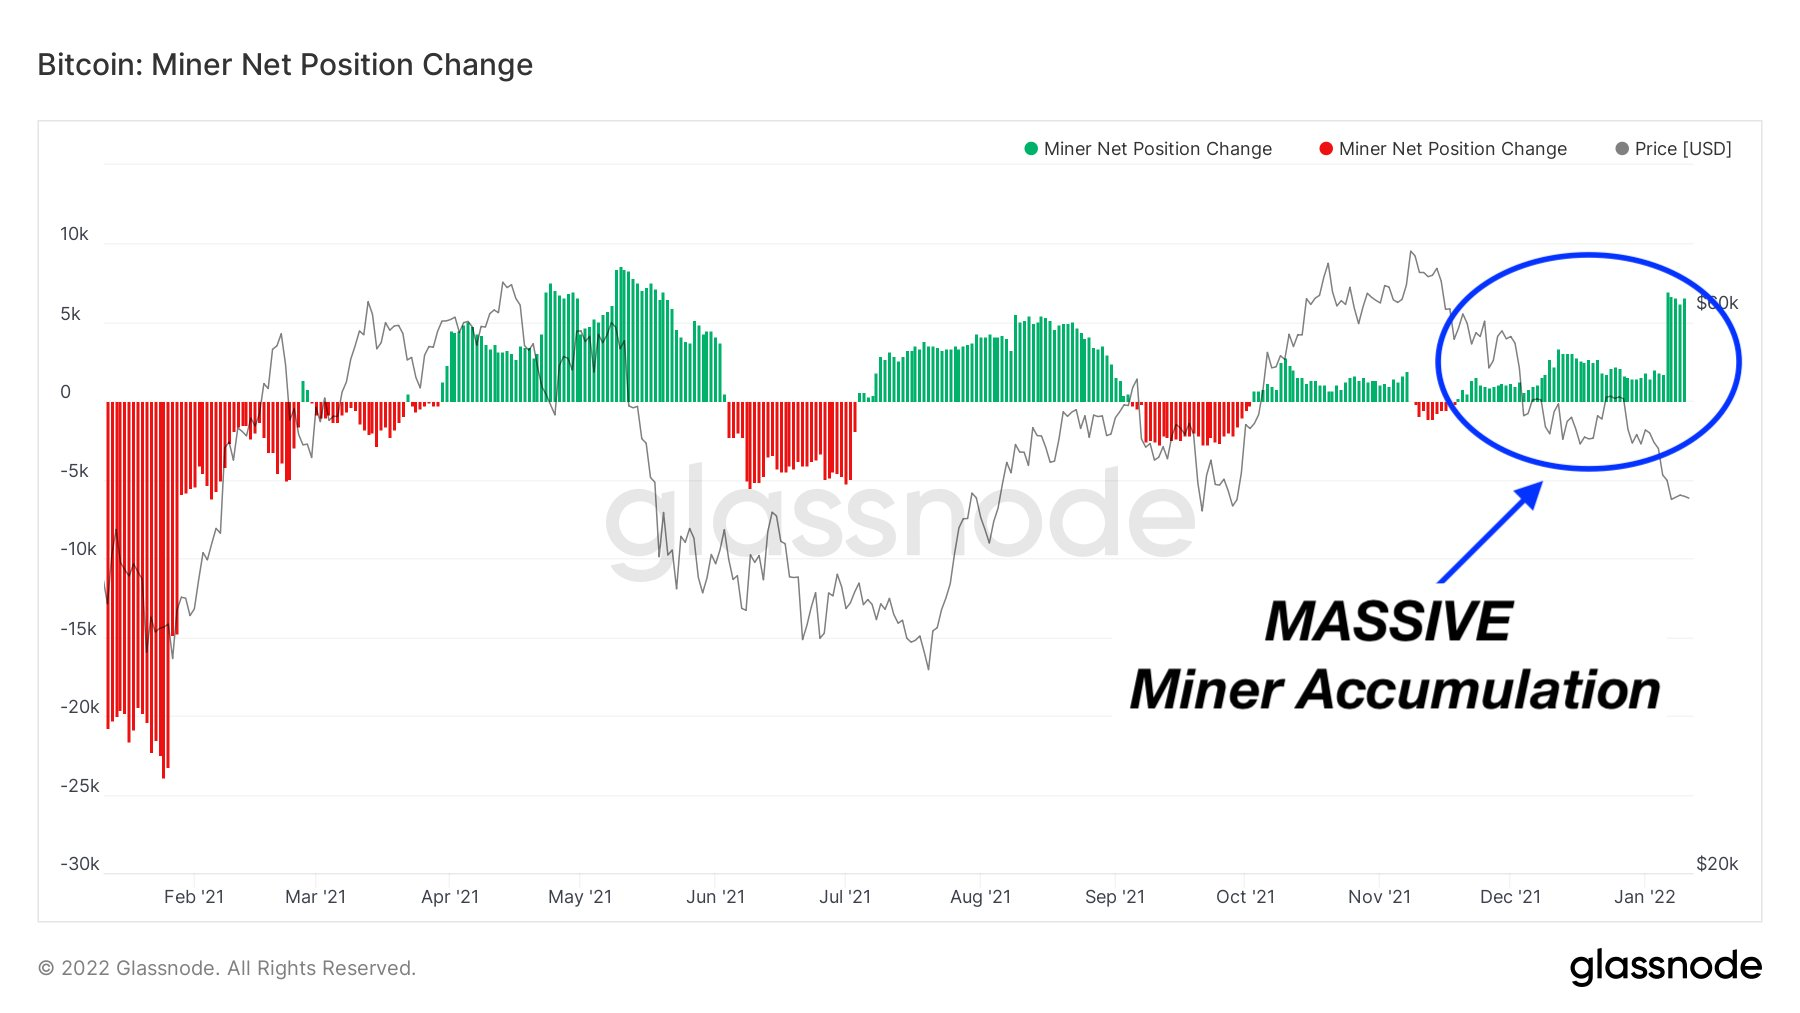

# 13. Transfer Volume Mean

El valor medio de una transferencia. Solo se cuentan las transferencias exitosas.

En definitivas cuentas, es la media de operaciones que se realizan dentro de la red.

A mayor volumen, mas interés hay lo que puede indicar una posible suba o baja repentina.


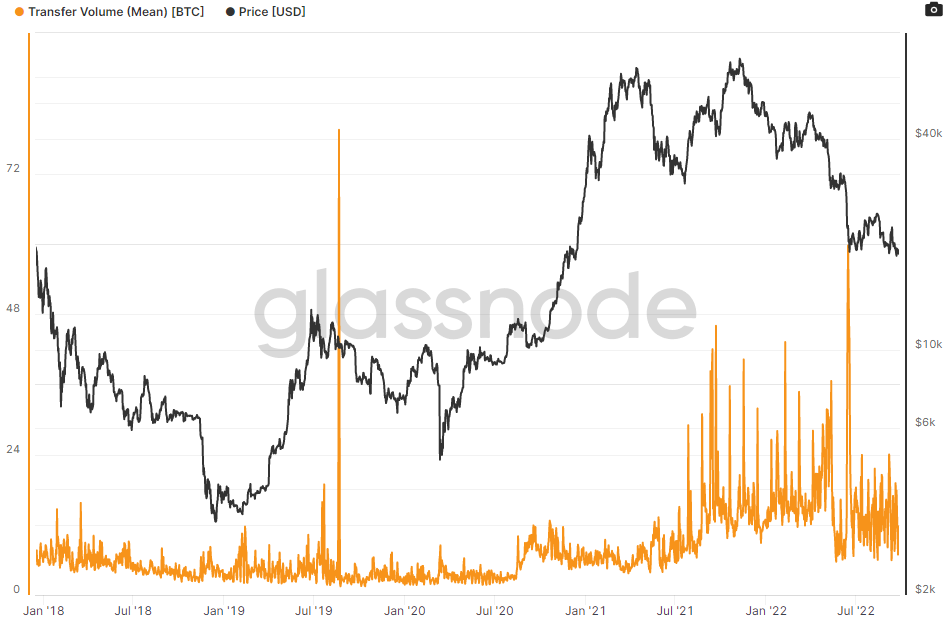


##14. Price USD OHLC


Es el precio que posee el Bitcoin en USD. De esta métrica podemos obtener el precio de apertura y cierre, pero también los máximos o mínimos de cada día, y así establecer un sistema de gráfico en velas.

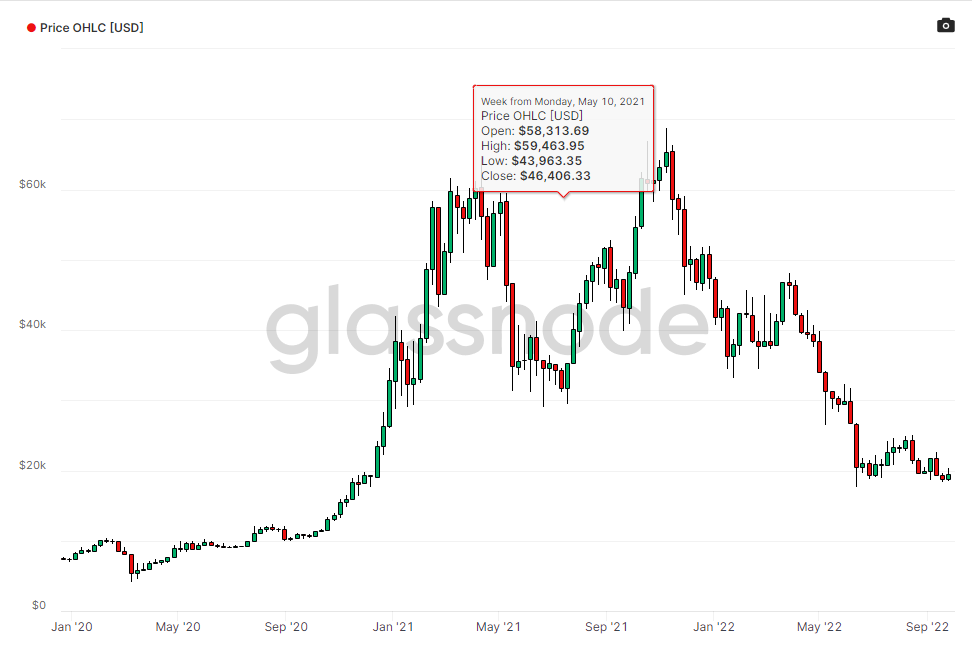

In [ ]:
import json
import requests
import pandas as pd
import csv
import pandas.io.json
from functools import reduce

# monkeypatch using standard python json module
pd.io.json._json.loads = lambda s, *a, **kw: json.loads(s)

In [ ]:
API_KEY = '23yTHbjR3sret3SNu4foURNObQ6'

In [ ]:
urls = [
        'https://api.glassnode.com/v1/metrics/indicators/rhodl_ratio',
        'https://api.glassnode.com/v1/metrics/market/mvrv_z_score',
        'https://api.glassnode.com/v1/metrics/indicators/pi_cycle_top',
        'https://api.glassnode.com/v1/metrics/distribution/balance_exchanges',
        'https://api.glassnode.com/v1/metrics/market/price_usd_close',
        'https://api.glassnode.com/v1/metrics/indicators/sopr',
        'https://api.glassnode.com/v1/metrics/indicators/realized_loss',
        'https://api.glassnode.com/v1/metrics/supply/profit_relative',
        'https://api.glassnode.com/v1/metrics/mining/difficulty_latest',
        'https://api.glassnode.com/v1/metrics/indicators/difficulty_ribbon_compression',
        'https://api.glassnode.com/v1/metrics/indicators/hash_ribbon',
        'https://api.glassnode.com/v1/metrics/distribution/balance_miners_change',
        'https://api.glassnode.com/v1/metrics/transactions/transfers_volume_mean',
        'https://api.glassnode.com/v1/metrics/market/price_usd_ohlc']

In [ ]:
df_list = []


res = [requests.get(url, params={
      'a': 'BTC',
      'api_key': API_KEY}) for url in urls]

for i in range(len(res)):
  df_list.append(pd.read_json(res[i].text, convert_dates=['t']))
  df_list[i].rename(columns={'v':urls[i].split('/')[-1]}, inplace=True)
  data.append(df_list[i])

''' 


df2= pd.read_json(res[2].text, convert_dates=['t'])
df2.rename(columns={'v':urls[2].split('/')[-1]}, inplace=True)

df3= pd.read_json(res[3].text, convert_dates=['t'])
df3.rename(columns={'v':urls[3].split('/')[-1]}, inplace=True)

df4= pd.read_json(res[4].text, convert_dates=['t'])
df4.rename(columns={'v':urls[4].split('/')[-1]}, inplace=True)

df5= pd.read_json(res[5].text, convert_dates=['t'])
df5.rename(columns={'v':urls[5].split('/')[-1]}, inplace=True)

df6= pd.read_json(res[6].text, convert_dates=['t'])
df6.rename(columns={'v':urls[6].split('/')[-1]}, inplace=True)

df7= pd.read_json(res[7].text, convert_dates=['t'])
df7.rename(columns={'v':urls[7].split('/')[-1]}, inplace=True)

df8= pd.read_json(res[8].text, convert_dates=['t'])
df8.rename(columns={'v':urls[8].split('/')[-1]}, inplace=True)

df9= pd.read_json(res[9].text, convert_dates=['t'])
df9.rename(columns={'v':urls[9].split('/')[-1]}, inplace=True)

df10= pd.read_json(res[10].text, convert_dates=['t'])
df10.rename(columns={'v':urls[10].split('/')[-1]}, inplace=True) '''


In [ ]:
df_list[1].head()

,t,mvrv_z_score
0,2009-01-03,0.0
1,2009-01-04,NaN
2,2009-01-05,NaN
3,2009-01-06,NaN
4,2009-01-07,NaN


In [ ]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['t'],
                                            how='outer'), data_frames)

In [ ]:
#Cambiar los datatypes
df_list.dtypes

t                    datetime64[ns]
rhodl_ratio                 float64
mvrv_z_score                float64
o                            object
balance_exchanges           float64
price_usd_close             float64
sopr                        float64
realized_loss               float64
profit_relative             float64
difficulty_latest           float64
hash_rate_mean              float64
dtype: object